In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
import pickle
%matplotlib inline

## Loading the Dataset

In [2]:
data= pd.read_csv("TelcoCustomerChurn.csv")
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


## Unique Values per coloumn

In [5]:
for i in data.columns:
   print(data[i].nunique())
   print(data[i].unique())


7043
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
2
['Female' 'Male']
2
[0 1]
2
['Yes' 'No']
2
['No' 'Yes']
73
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
2
['No' 'Yes']
3
['No phone service' 'No' 'Yes']
3
['DSL' 'Fiber optic' 'No']
3
['No' 'Yes' 'No internet service']
3
['Yes' 'No' 'No internet service']
3
['No' 'Yes' 'No internet service']
3
['No' 'Yes' 'No internet service']
3
['No' 'Yes' 'No internet service']
3
['No' 'Yes' 'No internet service']
3
['Month-to-month' 'One year' 'Two year']
2
['Yes' 'No']
4
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
1585
[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
6531
['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
2
['No' 'Yes']


In [6]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

### Counting the number of missing values

In [7]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

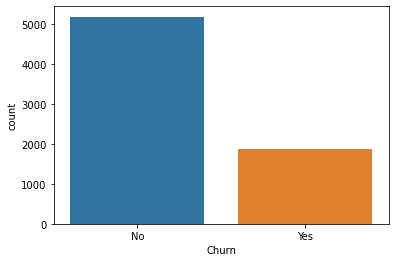

In [8]:
sns.countplot(data['Churn'])
plt.show()

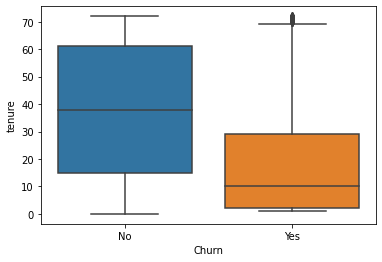

In [9]:
sns.boxplot(data['Churn'],data['tenure'],data=data)
plt.show()


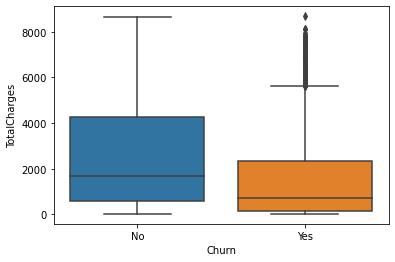

In [10]:
data['TotalCharges'] = data['TotalCharges'].replace(' ',np.nan)
data = data[data['TotalCharges'].notnull()]
data = data.reset_index()[data.columns]
data['TotalCharges']= data['TotalCharges'].astype(float)
sns.boxplot(data['Churn'],data['TotalCharges'],data=data)
plt.show()

In [11]:
data['TotalCharges']

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7027    1990.50
7028    7362.90
7029     346.45
7030     306.60
7031    6844.50
Name: TotalCharges, Length: 7032, dtype: float64

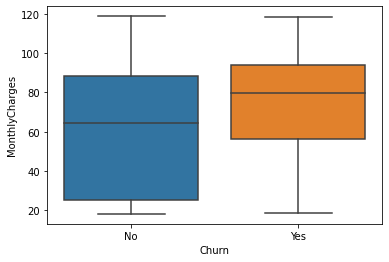

In [12]:
sns.boxplot(data['Churn'],data['MonthlyCharges'],data=data)
plt.show()

In [13]:
plots={1:[111],2:[121,122],3:[131,132,133],4:[221,222,223,224],5:[231,232,233,234.235],6:[231,232,233,234,235,236]}
def counplot(x,y,data):
    plt.figure(figsize=(20,20))
    for i, j in enumerate(y):
        plt.subplot(plots[len(y)][i])
        ax=sns.countplot(x=j,hue=x,data=data)
        ax.set_title(j)
    return plt.show()


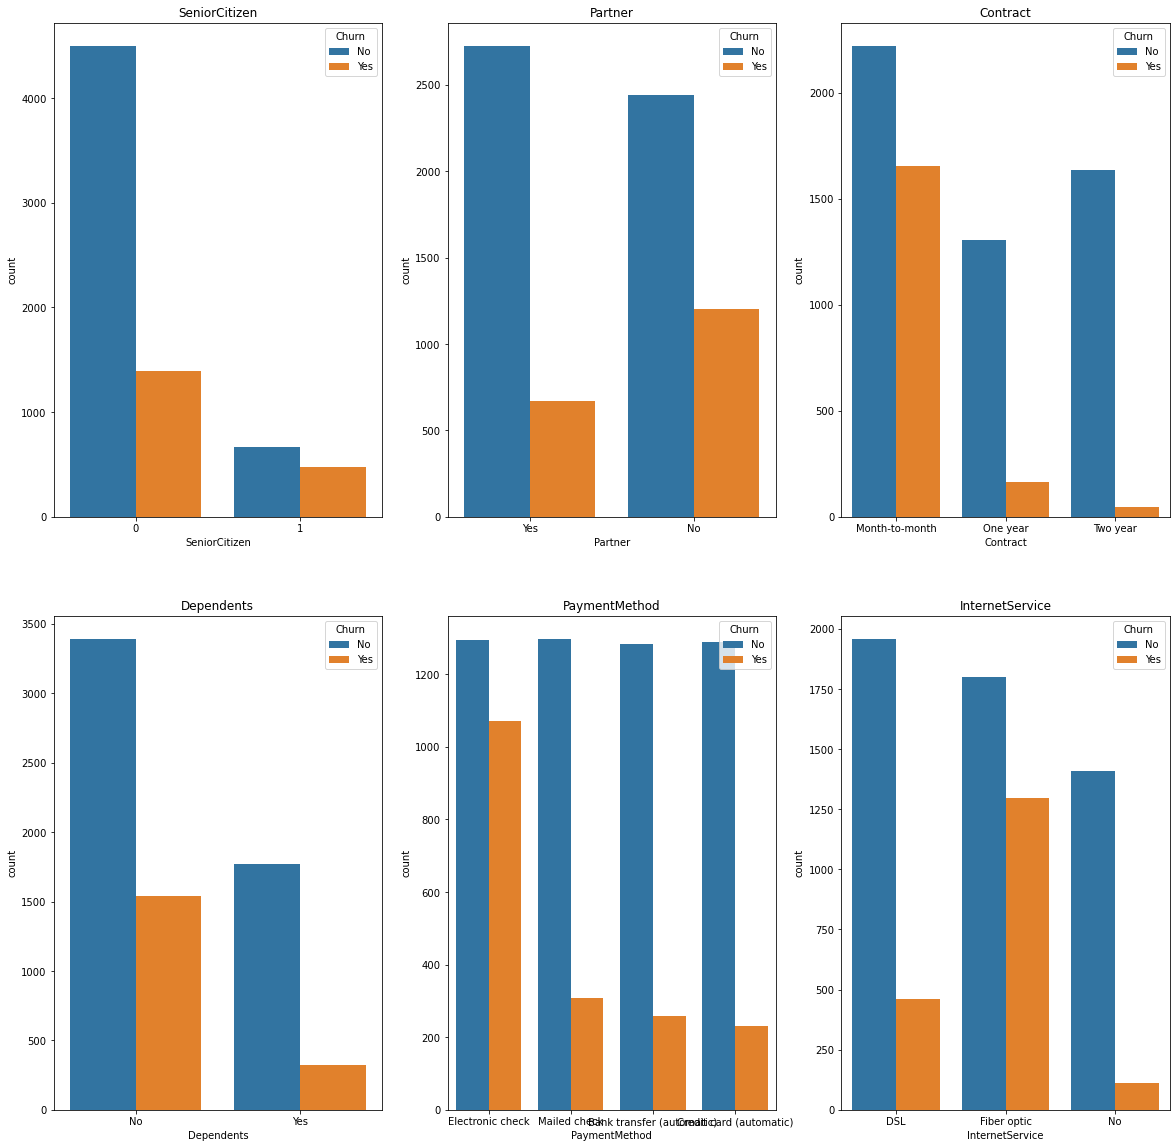

In [14]:
counplot('Churn',['SeniorCitizen','Partner','Contract','Dependents','PaymentMethod','InternetService'],data)


In [15]:
# Converting string values of churn to 1 and 0
data.loc[data.Churn=='No','Churn']=0
data.loc[data.Churn=='Yes','Churn']=1


### CHURN RATE

In [16]:
import matplotlib.ticker as mtick
churn_rate = data[["Churn", "customerID"]]
churn_rate ["churn_label"] = pd.Series(np.where((churn_rate["Churn"] == 0), "No", "Yes"))

sectors = churn_rate .groupby ("churn_label")
churn_rate = pd.DataFrame(sectors["customerID"].count())
churn_rate

<ipython-input-16-86587b1e1fd2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churn_rate ["churn_label"] = pd.Series(np.where((churn_rate["Churn"] == 0), "No", "Yes"))


,customerID
churn_label,
No,5163
Yes,1869


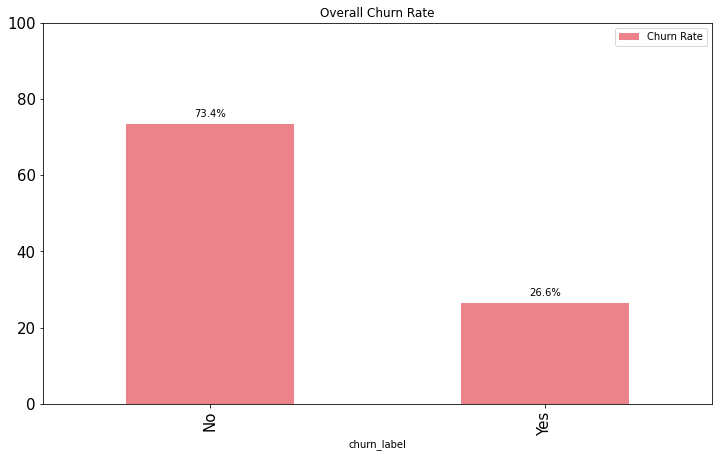

In [17]:
churn_rate ["Churn Rate"] = (
churn_rate ["customerID"]/ sum(churn_rate ["customerID"]) )*100

ax =  churn_rate[["Churn Rate"]].plot.bar(title = 'Overall Churn Rate',legend =True, table = False,grid = False,  subplots = False, 
figsize =(12, 7), color = '#ec838a', fontsize = 15, stacked=False, 
ylim =(0,100))
def add_value_labels(ax, spacing=5):   
    for rect in ax.patches:     
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2       
        space = spacing
        va = 'bottom'        
        if y_value < 0:           
            space *= -1          
            va = 'top'
        label = "{:.1f}%".format(y_value)
        ax.annotate(label,
                (x_value, y_value),         
                 xytext=(0, space),
                 textcoords="offset points", 
                 ha='center',va=va)
add_value_labels(ax)
ax.autoscale(enable=False, axis='both', tight=False)

### Churn Rate by Contract Type

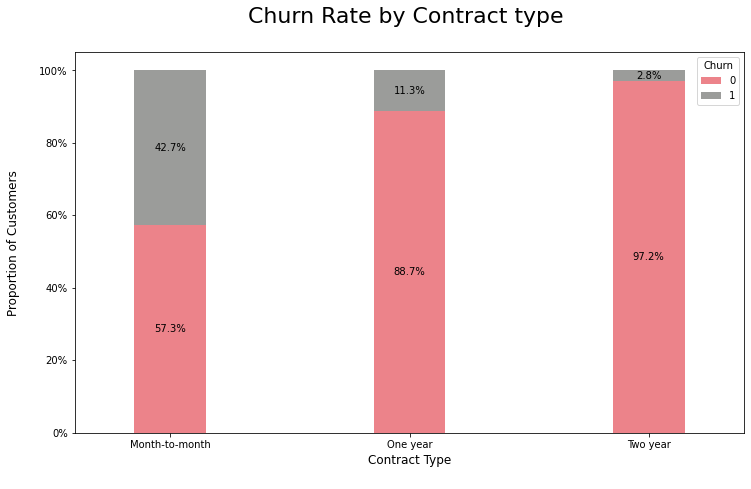

In [18]:
import matplotlib.ticker as mtick
contract_churn =data.groupby(
['Contract','Churn']).size().unstack()
contract_churn.rename(
columns={0:'No', 1:'Yes'})
colors  = ['#ec838a','#9b9c9a']

ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',width = 0.3,stacked = True,rot = 0,figsize = (12,7),color = colors)

plt.ylabel('Proportion of Customers\n',
horizontalalignment="center",fontstyle = "normal", 
fontsize = "large", fontfamily = "sans-serif")

plt.xlabel('Contract Type\n',horizontalalignment="center",
fontstyle = "normal", fontsize = "large", 
fontfamily = "sans-serif")

plt.title('Churn Rate by Contract type \n',
horizontalalignment="center", fontstyle = "normal", 
fontsize = "22", fontfamily = "sans-serif")


plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.1f}%'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center')
ax.autoscale(enable=False, axis='both', tight=False)

###  Churn Rate by Payment Method Type

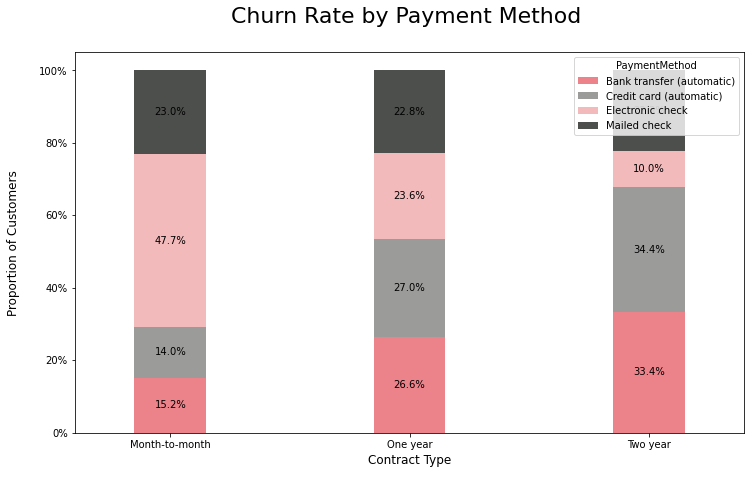

In [19]:
import matplotlib.ticker as mtick
contract_churn = data.groupby(['Contract',
'PaymentMethod']).size().unstack()
contract_churn.rename(columns=
{0:'No', 1:'Yes'})
colors  = ['#ec838a','#9b9c9a', '#f3babc' , '#4d4f4c']

ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(
kind='bar',width = 0.3,stacked = True,rot = 0,figsize = (12,7),
color = colors)

plt.ylabel('Proportion of Customers\n',
horizontalalignment="center",fontstyle = "normal", 
fontsize = "large", fontfamily = "sans-serif")

plt.xlabel('Contract Type\n',horizontalalignment="center",
fontstyle = "normal", fontsize = "large", 
fontfamily = "sans-serif")

plt.title('Churn Rate by Payment Method \n',
horizontalalignment="center", fontstyle = "normal", 
fontsize = "22", fontfamily = "sans-serif")


plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.1f}%'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center')
ax.autoscale(enable=False, axis='both', tight=False)

### Perform one Hot Encoding

In [20]:
data = pd.get_dummies(data,columns=['Contract','Dependents','DeviceProtection','gender','InternetService','MultipleLines',
'OnlineBackup','OnlineSecurity','PaperlessBilling','Partner','PaymentMethod','PhoneService','SeniorCitizen','StreamingMovies','StreamingTV','TechSupport'],drop_first=True)

In [21]:
# Converting string values of churn to 1 and 0
data.loc[data.Churn=='No','Churn']=0
data.loc[data.Churn=='Yes','Churn']=1


### Perform Feature Scaling

In [22]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
# Perform feature scaling in order to bring them on same scale.
coloumns_for_scaling = ['tenure','MonthlyCharges','TotalCharges']
data[coloumns_for_scaling]= scalar.fit_transform(data[coloumns_for_scaling])

In [48]:
with open('scaler','wb')as s:
    pickle.dump(data[coloumns_for_scaling],s)

In [49]:
with open('scaler','rb')as s:
    sc = pickle.load(s)

In [25]:
data.head()

,customerID,tenure,MonthlyCharges,TotalCharges,Churn,Contract_One year,Contract_Two year,Dependents_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,...,PaymentMethod_Electronic check,PaymentMethod_Mailed check,PhoneService_Yes,SeniorCitizen_1,StreamingMovies_No internet service,StreamingMovies_Yes,StreamingTV_No internet service,StreamingTV_Yes,TechSupport_No internet service,TechSupport_Yes
0,7590-VHVEG,-1.280248,-1.161694,-0.994194,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,5575-GNVDE,0.064303,-0.260878,-0.173740,0,1,0,0,0,1,...,0,1,1,0,0,0,0,0,0,0
2,3668-QPYBK,-1.239504,-0.363923,-0.959649,1,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
3,7795-CFOCW,0.512486,-0.747850,-0.195248,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,9237-HQITU,-1.239504,0.196178,-0.940457,1,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0


## Data Cleaning

In [26]:
#As customer ID does not provide any info so drop it
data = data.drop(['customerID'],axis=1)
data.head()
print(data.shape)

(7032, 31)


In [27]:
data.shape

(7032, 31)


### Creating feature variable x and target variable y

In [28]:
first_col = data.pop('Churn')
data.insert(30, 'Churn', first_col)
data

,tenure,MonthlyCharges,TotalCharges,Contract_One year,Contract_Two year,Dependents_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,gender_Male,InternetService_Fiber optic,...,PaymentMethod_Mailed check,PhoneService_Yes,SeniorCitizen_1,StreamingMovies_No internet service,StreamingMovies_Yes,StreamingTV_No internet service,StreamingTV_Yes,TechSupport_No internet service,TechSupport_Yes,Churn
0,-1.280248,-1.161694,-0.994194,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.064303,-0.260878,-0.173740,1,0,0,0,1,1,0,...,1,1,0,0,0,0,0,0,0,0
2,-1.239504,-0.363923,-0.959649,0,0,0,0,0,1,0,...,1,1,0,0,0,0,0,0,0,1
3,0.512486,-0.747850,-0.195248,1,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,1,0
4,-1.239504,0.196178,-0.940457,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,-0.343137,0.664868,-0.129180,1,0,1,0,1,1,0,...,1,1,0,0,1,0,1,0,1,0
7028,1.612573,1.276493,2.241056,1,0,1,0,1,0,1,...,0,1,0,0,1,0,1,0,0,0
7029,-0.872808,-1.170004,-0.854514,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7030,-1.158016,0.319168,-0.872095,0,0,0,0,0,1,1,...,1,1,1,0,0,0,0,0,0,1


In [29]:
data['Churn'] = data['Churn'].astype(int)
data['Churn'].astype(int)
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values



### split the data using stratify


In [30]:
print(X)


[[-1.28024804 -1.16169394 -0.99419409 ...  0.          0.
   0.        ]
 [ 0.06430269 -0.26087792 -0.17373982 ...  0.          0.
   0.        ]
 [-1.23950408 -0.36392329 -0.95964911 ...  0.          0.
   0.        ]
 ...
 [-0.87280842 -1.17000405 -0.85451414 ...  0.          0.
   0.        ]
 [-1.15801615  0.31916782 -0.87209546 ...  0.          0.
   0.        ]
 [ 1.36810945  1.35793167  2.01234407 ...  1.          0.
   1.        ]]


In [31]:
print(y)

[0 0 1 ... 0 1 0]


In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50,stratify=y)


In [33]:
X


array([[-1.28024804, -1.16169394, -0.99419409, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.06430269, -0.26087792, -0.17373982, ...,  0.        ,
         0.        ,  0.        ],
       [-1.23950408, -0.36392329, -0.95964911, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.87280842, -1.17000405, -0.85451414, ...,  0.        ,
         0.        ,  0.        ],
       [-1.15801615,  0.31916782, -0.87209546, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.36810945,  1.35793167,  2.01234407, ...,  1.        ,
         0.        ,  1.        ]])

In [34]:
data.head()

,tenure,MonthlyCharges,TotalCharges,Contract_One year,Contract_Two year,Dependents_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,gender_Male,InternetService_Fiber optic,...,PaymentMethod_Mailed check,PhoneService_Yes,SeniorCitizen_1,StreamingMovies_No internet service,StreamingMovies_Yes,StreamingTV_No internet service,StreamingTV_Yes,TechSupport_No internet service,TechSupport_Yes,Churn
0,-1.280248,-1.161694,-0.994194,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.064303,-0.260878,-0.173740,1,0,0,0,1,1,0,...,1,1,0,0,0,0,0,0,0,0
2,-1.239504,-0.363923,-0.959649,0,0,0,0,0,1,0,...,1,1,0,0,0,0,0,0,0,1
3,0.512486,-0.747850,-0.195248,1,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,1,0
4,-1.239504,0.196178,-0.940457,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1


In [35]:
y



array([0, 0, 1, ..., 0, 1, 0])

In [36]:
data.dtypes

tenure                                   float64
MonthlyCharges                           float64
TotalCharges                             float64
Contract_One year                          uint8
Contract_Two year                          uint8
Dependents_Yes                             uint8
DeviceProtection_No internet service       uint8
DeviceProtection_Yes                       uint8
gender_Male                                uint8
InternetService_Fiber optic                uint8
InternetService_No                         uint8
MultipleLines_No phone service             uint8
MultipleLines_Yes                          uint8
OnlineBackup_No internet service           uint8
OnlineBackup_Yes                           uint8
OnlineSecurity_No internet service         uint8
OnlineSecurity_Yes                         uint8
PaperlessBilling_Yes                       uint8
Partner_Yes                                uint8
PaymentMethod_Credit card (automatic)      uint8
PaymentMethod_Electr

In [37]:
from imblearn.over_sampling import SMOTE
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=50)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Before OverSampling, counts of label '1': 1308
Before OverSampling, counts of label '0': 3614 

After OverSampling, the shape of train_X: (7228, 30)
After OverSampling, the shape of train_y: (7228,) 

After OverSampling, counts of label '1': 3614
After OverSampling, counts of label '0': 3614


### Implementing the models

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics


### Logistic Regression

In [39]:
logModel = LogisticRegression(max_iter=1000)
logModel.fit(X_train,y_train)
pred = logModel.predict(X_test)
probs_log = logModel.predict_proba(X_test)
logModel_accuracy = round(metrics.accuracy_score(y_test,pred)*100,2)

### Decision Tree 

In [40]:
dtModel = DecisionTreeClassifier(criterion = 'gini',random_state=50)
dtModel.fit(X_train,y_train)
dt_pred = dtModel.predict(X_test)
dt_accuracy = round(metrics.accuracy_score(y_test,dt_pred)*100,2)

### Random Forest

In [41]:
rfModel = RandomForestClassifier(n_estimators=100,criterion = 'entropy',random_state=0)
rfModel.fit(X_train,y_train)
rf_pred = rfModel.predict(X_test)
rf_accuracy = round(metrics.accuracy_score(y_test,rf_pred)*100,2)

### Comparing all model accuracies

In [42]:
Model_Comparison = pd.DataFrame({'Model':['Logistic Regression','DesionTree','RandomForest'],'Score':[logModel_accuracy,dt_accuracy,rf_accuracy]})
Model_Comparison_df = Model_Comparison.sort_values(by='Score',ascending=False)
Model_Comparison_df = Model_Comparison_df.set_index('Score')
Model_Comparison_df.reset_index()

,Score,Model
0,79.43,Logistic Regression
1,78.72,RandomForest
2,72.13,DesionTree


### Generating Confusion Matrix for Logistic Regression

array([[1379,  170],
       [ 264,  297]], dtype=int64)

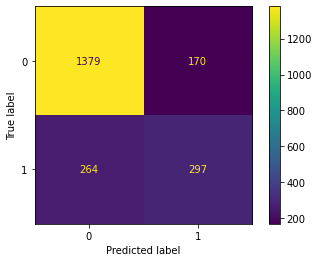

In [43]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
conf_logmodel=confusion_matrix(y_test,pred)
plot_confusion_matrix(logModel, X_test, y_test) 
conf_logmodel

Text(0.5, 1.0, 'Precision-Recall curve')

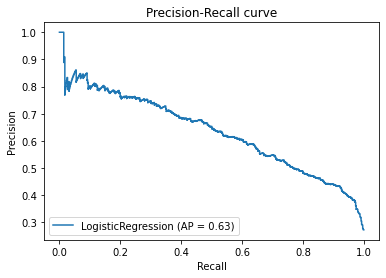

In [44]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
disp=plot_precision_recall_curve(logModel, X_test, y_test)
disp.ax_.set_title('Precision-Recall curve')

AUC: 0.83


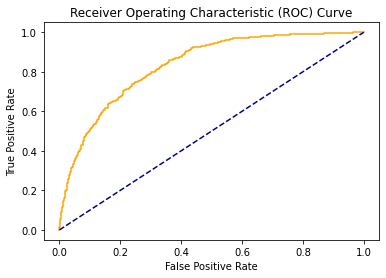

In [45]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
probs = probs_log[:, 1] # Keep Probabilities of the positive class only.
auc = roc_auc_score(y_test, probs)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
print('AUC: %.2f' % auc)

### Model Storing using pickle

In [46]:
with open('LogReg_pickle2','wb')as f:
    pickle.dump(logModel,f)
    

In [47]:
with open('LogReg_pickle2','rb')as f:
    rf = pickle.load(f)